# About this notebook
------------------------------------------

This notebook is used to execute code suggested by ChatGPT. Prompts are included in the *01-introductory-workflow.md* document, contained in this directory.

Any code included here has been generated by AI - results and mileage may vary! Different people using the same prompt may get different coded responses from the AI.

In [1]:
import requests

url = "https://raw.githubusercontent.com/unmrds/cc-R-RStudio/master/cc-R-Names/data/2010"
file_name = "2010.csv"

response = requests.get(url)

if response.status_code == 200:
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f"File '{file_name}' downloaded and saved successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")


File '2010.csv' downloaded and saved successfully.


In [2]:
import pandas as pd

file_name = "2010.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_name)

# Print the first five rows of the DataFrame
print(df.head(5))

       name sex  count
0  Isabella   F  22925
1    Sophia   F  20648
2      Emma   F  17354
3    Olivia   F  17030
4       Ava   F  15436


In [3]:
import pandas as pd

# Assuming you have a DataFrame 'df' with columns 'name,' 'sex,' and 'count'

# Group the data by the 'sex' column
grouped_sex = df.groupby('sex')

In [4]:
# Sort the groups within 'grouped_sex' by the variable 'count'
sorted_grouped_sex = grouped_sex.apply(lambda group: group.sort_values(by='count'))

# Now, 'sorted_grouped_sex' contains the groups sorted by 'count'


In [6]:
# Print the entire sorted_grouped_sex DataFrame
print(sorted_grouped_sex)

# Alternatively, to view the first few rows, you can use:
# print(sorted_grouped_sex.head())

# You can also use other DataFrame inspection methods like .info() and .describe() as needed.


                name sex  count
sex                            
F   19822  Zyrihanna   F      5
    17930   Gissella   F      5
    17929     Gionni   F      5
    17928     Gilana   F      5
    17927      Gifty   F      5
...              ...  ..    ...
M   19827    William   M  17060
    19826     Jayden   M  17191
    19825    Michael   M  17366
    19824      Ethan   M  18008
    19823      Jacob   M  22139

[34089 rows x 3 columns]


In [7]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [8]:
sorted_grouped_sex = grouped_sex.apply(lambda group: group.sort_values(by='count', ascending=False))

In [9]:
print(sorted_grouped_sex)

               name sex  count
sex                           
F   0      Isabella   F  22925
    1        Sophia   F  20648
    2          Emma   F  17354
    3        Olivia   F  17030
    4           Ava   F  15436
...             ...  ..    ...
M   32724    Gasper   M      5
    32723    Garytt   M      5
    32722   Garvens   M      5
    32721   Garritt   M      5
    34088     Zzyzx   M      5

[34089 rows x 3 columns]


In [21]:
# Find the names with the highest count for 'F' and 'M' groups
highest_count_names = grouped_sex.apply(lambda group: group[group['count'] == group['count'].max()]['name'])

In [22]:
highest_count_names

sex       
F    0        Isabella
M    19823       Jacob
Name: name, dtype: object

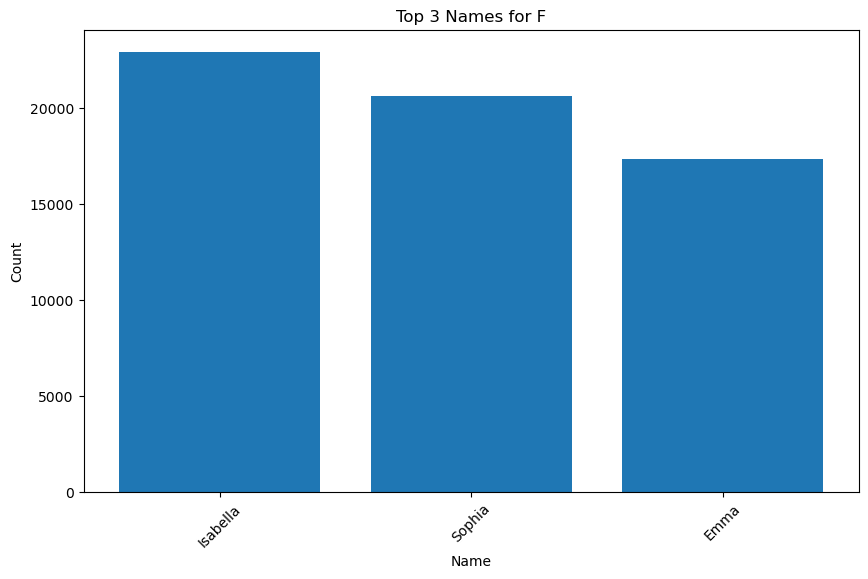

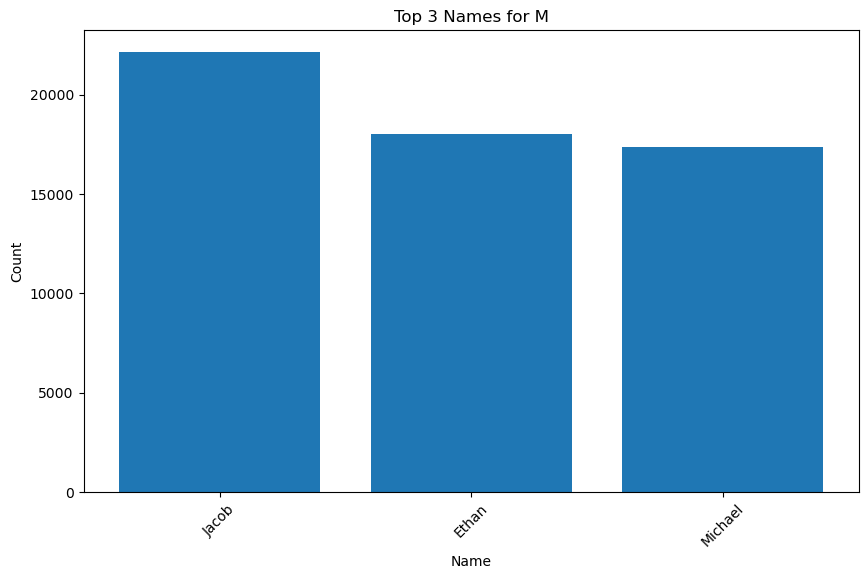

In [23]:
import matplotlib.pyplot as plt

# Assuming you have a Pandas GroupBy object 'grouped_sex' and you want to plot the top 3 names by count for each sex

# Define a function to plot the most popular names by sex
def plot_top_names(grouped_df, sex):
    top_names = grouped_df.get_group(sex).nlargest(3, 'count')
    plt.figure(figsize=(10, 6))
    plt.bar(top_names['name'], top_names['count'])
    plt.title(f"Top 3 Names for {sex}")
    plt.xlabel("Name")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Plot the top 3 names for 'F' (female) and 'M' (male)
plot_top_names(grouped_sex, 'F')
plot_top_names(grouped_sex, 'M')


File '2010.csv' downloaded and saved successfully.
sex
F    Isabella
M       Jacob
Name: count, dtype: object


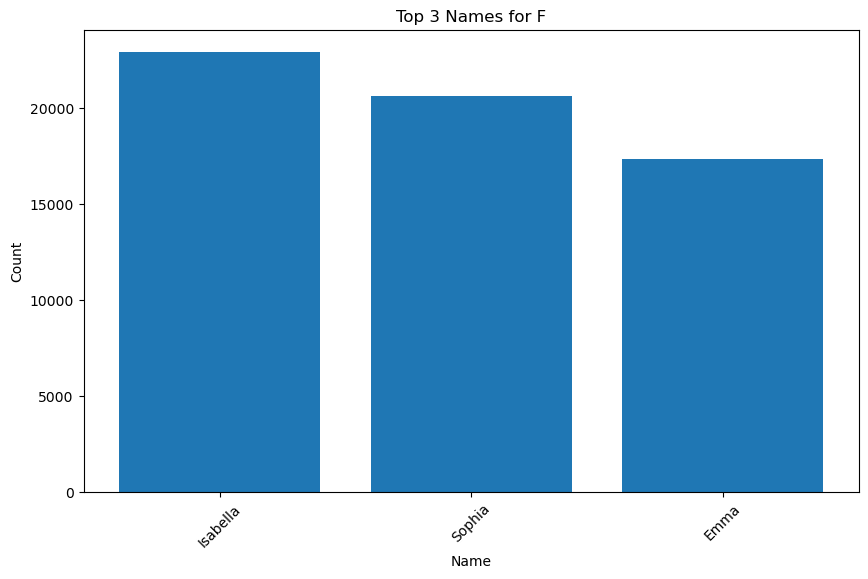

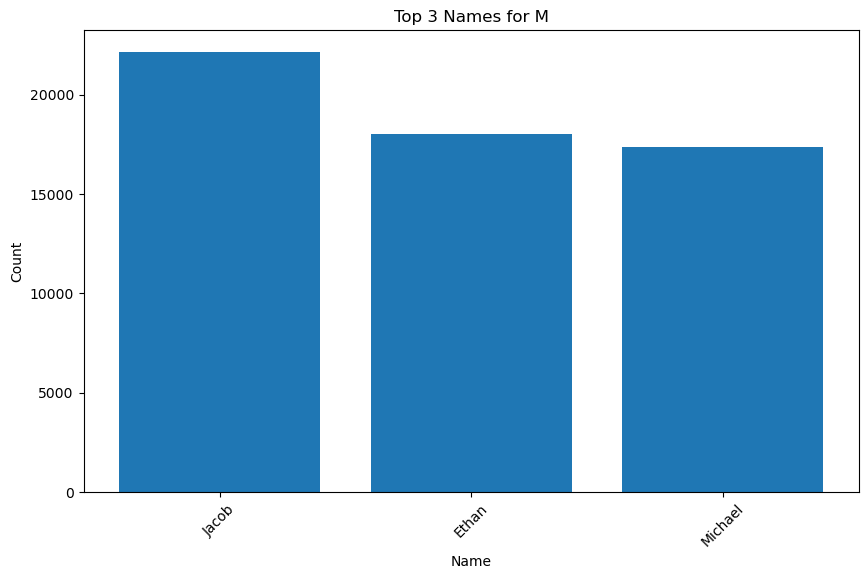

In [24]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the URL and file name
url = "https://raw.githubusercontent.com/unmrds/cc-R-RStudio/master/cc-R-Names/data/2010"
file_name = "2010.csv"

# Download the file and save it locally
response = requests.get(url)
if response.status_code == 200:
    with open(file_name, 'wb') as file:
        file.write(response.content)
        print(f"File '{file_name}' downloaded and saved successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

# Read the CSV file into a DataFrame
df = pd.read_csv(file_name)

# Group the data by 'sex'
grouped_sex = df.groupby('sex')

# Find the most popular name by sex
most_popular_names = grouped_sex['count'].idxmax().apply(lambda x: df['name'][x])

# Print the most popular name by sex
print(most_popular_names)

# Plot the top 3 names by count for each sex
def plot_top_names(grouped_df, sex):
    top_names = grouped_df.get_group(sex).nlargest(3, 'count')
    plt.figure(figsize=(10, 6))
    plt.bar(top_names['name'], top_names['count'])
    plt.title(f"Top 3 Names for {sex}")
    plt.xlabel("Name")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Plot the top 3 names for 'F' (female) and 'M' (male)
plot_top_names(grouped_sex, 'F')
plot_top_names(grouped_sex, 'M')
